# L3v2 : Instantaneous Velocity in 2D

Here's a **step-by-step algorithm** for computing the **instantaneous velocity vector** of a 2D motion, along with its **magnitude (speed)** and **direction (angle θ)** with respect to the x-axis:

---

### 🔢 **Step-by-Step Algorithm: Instantaneous Velocity in 2D Motion**

---

#### **Step 1: Define the Coordinate System**

* Choose:

  * Origin $O$
  * Positive $x$-axis and $y$-axis
  * Unit vectors $\hat{i}$ and $\hat{j}$

---

#### **Step 2: Represent Position Vector**

* Let the position of the object at time $t$ be:

  $$
  \vec{r}(t) = x(t)\hat{i} + y(t)\hat{j}
  $$

---

#### **Step 3: Displacement Vector (Δr)**

* After a small time $\Delta t$, new position:

  $$
  \vec{r}(t + \Delta t)
  $$
* Displacement vector:

  $$
  \Delta \vec{r} = \vec{r}(t + \Delta t) - \vec{r}(t)
  $$

---

#### **Step 4: Velocity Vector (Definition)**

* Instantaneous velocity is defined as:

  $$
  \vec{v}(t) = \lim_{\Delta t \to 0} \frac{\Delta \vec{r}}{\Delta t}
  $$

---

#### **Step 5: Component-wise Derivatives**

* Velocity components:

  $$
  \vec{v}(t) = \frac{dx(t)}{dt} \hat{i} + \frac{dy(t)}{dt} \hat{j}
  $$
* Let:

  * $v_x = \frac{dx(t)}{dt}$
  * $v_y = \frac{dy(t)}{dt}$

---

#### **Step 6: Compute Speed**

* Magnitude of the velocity vector (speed):

  $$
  |\vec{v}(t)| = \sqrt{v_x^2 + v_y^2}
  $$

---

#### **Step 7: Compute Direction (Angle θ)**

* Direction (angle) of velocity with respect to the x-axis:

  $$
  \theta(t) = \tan^{-1}\left(\frac{v_y}{v_x}\right)
  $$
* Handle quadrants using `atan2(vy, vx)` for correct sign

---

#### **Step 8: Final Output**

* Output:

  * Velocity vector: $\vec{v}(t) = v_x \hat{i} + v_y \hat{j}$
  * Speed: $|\vec{v}(t)|$
  * Direction angle: $\theta(t)$

---

### ✅ Summary Table

| Concept         | Formula                                                            | 
| --------------- | ------------------------------------------------------------------ | 
| Position vector | $\vec{r}(t) = x(t) \hat{i} + y(t) \hat{j}$                         |  
| Displacement    | $\Delta \vec{r} = \vec{r}(t + \Delta t) - \vec{r}(t)$              |  
| Velocity vector | $\vec{v}(t) = \frac{d\vec{r}}{dt} = v_x \hat{i} + v_y \hat{j}$     | 
| Speed           | $ \vec{v} =  \sqrt{v_x^2 + v_y^2} $                                | 
| Direction angle | $\theta = \tan^{-1}(v_y/v_x)$ or $\theta = \text{atan2}(v_y, v_x)$ | 

---

Would you like a **code implementation** of this using NumPy and matplotlib to visualize velocity vectors, speed, and angle over time?


In [1]:
import math

# Step 1: Define position functions x(t) and y(t)
def x(t):
    # Example: Horizontal position for projectile motion (initial velocity vx = 10 m/s)
    return 10 * t

def y(t):
    # Example: Vertical position for projectile motion (vy = 20 m/s, gravity = 9.8 m/s^2)
    return 20 * t - 0.5 * 9.8 * t**2

# Step 2: Numerical derivative function
def derivative(f, t, dt=1e-5):
    return (f(t + dt) - f(t)) / dt

# Step 3: Compute velocity vector, speed, and angle
def velocity_info(t):
    vx = derivative(x, t)
    vy = derivative(y, t)

    # Velocity vector
    velocity_vector = (vx, vy)

    # Speed (magnitude of velocity)
    speed = math.sqrt(vx**2 + vy**2)

    # Direction angle in radians and degrees
    theta_rad = math.atan2(vy, vx)  # Handles quadrant
    theta_deg = math.degrees(theta_rad)

    return {
        "vx": vx,
        "vy": vy,
        "velocity_vector": velocity_vector,
        "speed": speed,
        "angle_radians": theta_rad,
        "angle_degrees": theta_deg
    }

# Example usage:
time = 1.0  # seconds
result = velocity_info(time)

# Print results
print(f"At time t = {time} seconds:")
print(f"  Velocity Vector: v = {result['velocity_vector'][0]:.2f} i + {result['velocity_vector'][1]:.2f} j (m/s)")
print(f"  Speed: {result['speed']:.2f} m/s")
print(f"  Direction (angle from x-axis): {result['angle_degrees']:.2f} degrees")


At time t = 1.0 seconds:
  Velocity Vector: v = 10.00 i + 10.20 j (m/s)
  Speed: 14.28 m/s
  Direction (angle from x-axis): 45.57 degrees


![](https://github.com/book-g/only_image/blob/main/L3v2%20+%20Instantaneous%20Velocity%20in%202D%20+%201.jpeg?raw=true)

![](https://github.com/book-g/only_image/blob/main/L3v2%20+%20Instantaneous%20Velocity%20in%202D%20+%202.jpeg?raw=true)

Here is a complete Python script that includes:

* The **trajectory plot** of the object.
* **Velocity vectors** shown as arrows at different times.
* **Direction angles** (from x-axis).
* Uses **`matplotlib`** for visualization.

---

### ✅ **Python Code with Trajectory & Velocity Vector Plot**

```python
import math
import matplotlib.pyplot as plt

# Step 1: Define position functions x(t) and y(t)
def x(t):
    return 10 * t  # vx = 10 m/s

def y(t):
    return 20 * t - 0.5 * 9.8 * t**2  # vy = 20 m/s, g = 9.8 m/s^2

# Step 2: Derivative approximation
def derivative(f, t, dt=1e-5):
    return (f(t + dt) - f(t)) / dt

# Step 3: Velocity and direction info
def velocity_info(t):
    vx = derivative(x, t)
    vy = derivative(y, t)
    speed = math.sqrt(vx**2 + vy**2)
    angle = math.degrees(math.atan2(vy, vx))  # angle in degrees
    return vx, vy, speed, angle

# Step 4: Generate plot
def plot_trajectory_with_velocity(t_start, t_end, t_step):
    times = []
    x_vals = []
    y_vals = []
    velocity_vectors = []

    for t in [t_start + i * t_step for i in range(int((t_end - t_start) / t_step) + 1)]:
        times.append(t)
        x_pos = x(t)
        y_pos = y(t)
        vx, vy, speed, angle = velocity_info(t)

        x_vals.append(x_pos)
        y_vals.append(y_pos)
        velocity_vectors.append((vx, vy, speed, angle, x_pos, y_pos))

    plt.figure(figsize=(10, 6))
    plt.plot(x_vals, y_vals, label='Trajectory', color='blue')

    # Plot velocity vectors
    for vx, vy, speed, angle, x_pos, y_pos in velocity_vectors:
        plt.quiver(x_pos, y_pos, vx, vy, angles='xy', scale_units='xy', scale=1, color='red', width=0.003)
        plt.text(x_pos, y_pos + 1, f"{round(angle)}°", fontsize=8, color='darkgreen')

    plt.title("2D Motion with Velocity Vectors and Angles")
    plt.xlabel("X position (m)")
    plt.ylabel("Y position (m)")
    plt.grid(True)
    plt.legend()
    plt.axis('equal')
    plt.show()

# Run the visualization
plot_trajectory_with_velocity(t_start=0, t_end=4, t_step=0.5)
```

---

### 📊 **What You'll See:**

* A **blue curve** showing the projectile's trajectory.
* **Red arrows** (velocity vectors) at several time steps.
* **Green text** showing the **direction angle** (in degrees) of each velocity vector.

---

### 🧠 Summary Table of Steps

| Step | Component                       | Description                                   |
| ---- | ------------------------------- | --------------------------------------------- |
| 1    | `x(t), y(t)`                    | Define horizontal and vertical motion         |
| 2    | `derivative(f, t)`              | Compute dx/dt and dy/dt (velocity components) |
| 3    | `velocity_info(t)`              | Returns velocity vector, speed, and angle     |
| 4    | `plot_trajectory_with_velocity` | Uses `matplotlib` to draw path and vectors    |

---

Would you like to add **acceleration vectors**, or export this animation as a video or GIF next?


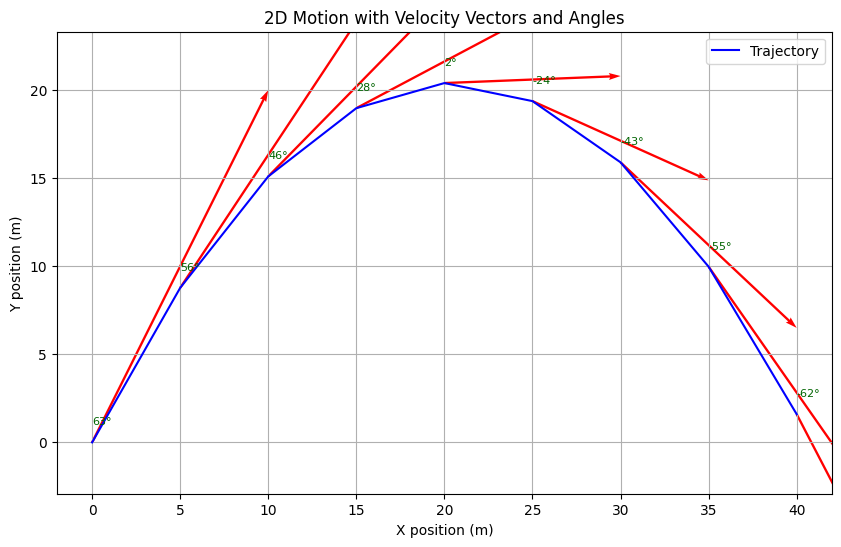

In [2]:
import math
import matplotlib.pyplot as plt

# Step 1: Define position functions x(t) and y(t)
def x(t):
    return 10 * t  # vx = 10 m/s

def y(t):
    return 20 * t - 0.5 * 9.8 * t**2  # vy = 20 m/s, g = 9.8 m/s^2

# Step 2: Derivative approximation
def derivative(f, t, dt=1e-5):
    return (f(t + dt) - f(t)) / dt

# Step 3: Velocity and direction info
def velocity_info(t):
    vx = derivative(x, t)
    vy = derivative(y, t)
    speed = math.sqrt(vx**2 + vy**2)
    angle = math.degrees(math.atan2(vy, vx))  # angle in degrees
    return vx, vy, speed, angle

# Step 4: Generate plot
def plot_trajectory_with_velocity(t_start, t_end, t_step):
    times = []
    x_vals = []
    y_vals = []
    velocity_vectors = []

    for t in [t_start + i * t_step for i in range(int((t_end - t_start) / t_step) + 1)]:
        times.append(t)
        x_pos = x(t)
        y_pos = y(t)
        vx, vy, speed, angle = velocity_info(t)

        x_vals.append(x_pos)
        y_vals.append(y_pos)
        velocity_vectors.append((vx, vy, speed, angle, x_pos, y_pos))

    plt.figure(figsize=(10, 6))
    plt.plot(x_vals, y_vals, label='Trajectory', color='blue')

    # Plot velocity vectors
    for vx, vy, speed, angle, x_pos, y_pos in velocity_vectors:
        plt.quiver(x_pos, y_pos, vx, vy, angles='xy', scale_units='xy', scale=1, color='red', width=0.003)
        plt.text(x_pos, y_pos + 1, f"{round(angle)}°", fontsize=8, color='darkgreen')

    plt.title("2D Motion with Velocity Vectors and Angles")
    plt.xlabel("X position (m)")
    plt.ylabel("Y position (m)")
    plt.grid(True)
    plt.legend()
    plt.axis('equal')
    plt.show()

# Run the visualization
plot_trajectory_with_velocity(t_start=0, t_end=4, t_step=0.5)
